In [1]:
import librosa
%matplotlib inline
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [2]:
input1_path = '../samples/steve-morrell/giveit-07.wav'
input2_path = '../samples/steve-morrell/lifegift-07.wav'
output_path = 'merge-test-out.wav'

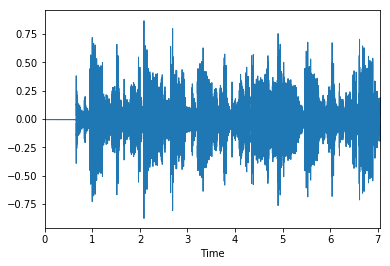

In [3]:
x1, sr1 = librosa.load(input1_path)
librosa.display.waveplot(x1, sr=sr1)

In [4]:
ipd.Audio(input1_path)

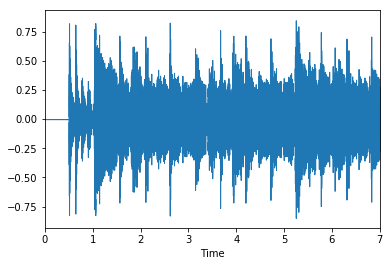

In [5]:
x2, sr2 = librosa.load(input2_path)
librosa.display.waveplot(x2, sr=sr2)

In [6]:
ipd.Audio(input2_path)

In [7]:
X1 = librosa.stft(x1)
Xdb1 = librosa.amplitude_to_db(X1)

X2 = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(X2)

/home/sb/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


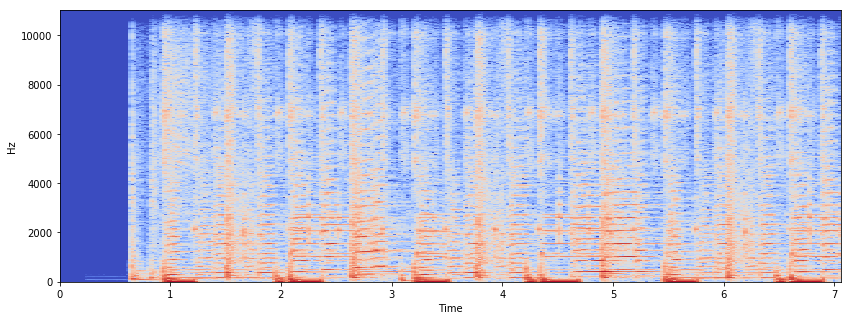

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb1, sr=sr1, x_axis='time', y_axis='hz')

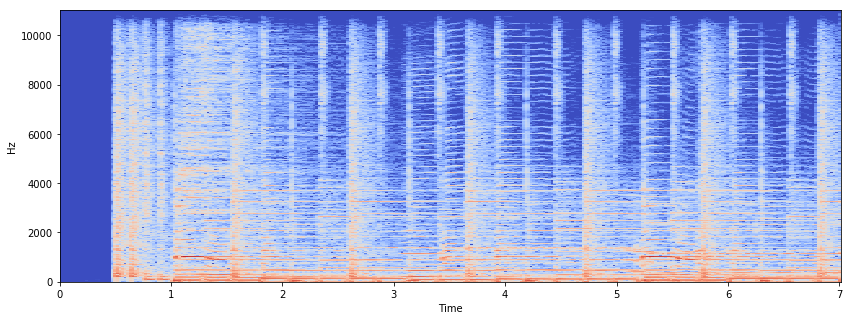

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='hz')

In [10]:
X1.shape

(1025, 304)

In [11]:
X2.shape

(1025, 302)

In [12]:
amp_range = X1.shape[0]
shared_length = min(X1.shape[1],X2.shape[1])

In [13]:
mix = np.random.random(size=(amp_range,shared_length)) > .5

In [14]:
X3 = mix * X1[:,:shared_length] + np.logical_not(mix) * X2[:,:shared_length]

/home/sb/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


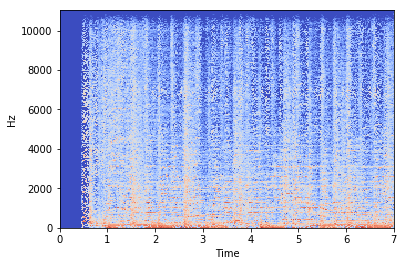

In [15]:
Xdb3 = librosa.amplitude_to_db(X3)
librosa.display.specshow(Xdb3, sr=sr1, x_axis='time', y_axis='hz')

In [16]:
X3 = librosa.db_to_amplitude(Xdb3)
x3 = librosa.core.istft(X3)

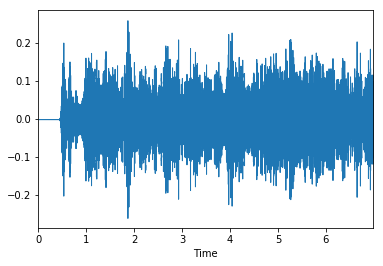

In [17]:
librosa.output.write_wav(output_path, x3, sr1)
librosa.display.waveplot(x3, sr=sr1)

In [18]:
ipd.Audio(output_path)

In [19]:
output_path

'merge-test-out.wav'

In [20]:
input1_path = '../samples/steve-morrell/Give It Up Donate Blood.mp3'
input2_path = '../samples/steve-morrell/Life Gift.mp3'
output_path = 'merge-test-out.wav'

In [21]:
def load_to_db(inp, duration = 30):
    x, sr = librosa.load(inp, duration = duration)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(X)
    return Xdb, sr

In [22]:
def mix_transform(Xdb1,Xdb2):
    db_range = Xdb1.shape[0]
    shared_length = min(Xdb1.shape[1],Xdb2.shape[1])
    
    mix = np.random.random(size=(db_range,shared_length)) > .5
    
    Xdb3 = mix * Xdb1[:,:shared_length] + np.logical_not(mix) * Xdb2[:,:shared_length]
    
    return Xdb3

In [36]:
def average_transform(Xdb1,Xdb2):
    db_range = Xdb1.shape[0]
    shared_length = min(Xdb1.shape[1],Xdb2.shape[1])
    
    half = np.ones((db_range,shared_length)) / 2.
    
    Xdb3 = (Xdb1[:,:shared_length] + Xdb2[:,:shared_length]) #* half
    
    return Xdb3

In [37]:
def merge(in1, in2, out, transform_method = mix_transform, duration=30):
    Xdb1, sr = load_to_db(in1,duration = duration)
    Xdb2, sr = load_to_db(in2, duration = duration )
    
    Xdb3 = transform_method(Xdb1,Xdb2)
    X3 = librosa.db_to_amplitude(Xdb3)
    x3 = librosa.core.istft(X3)
    librosa.output.write_wav(out, x3, sr)

In [38]:
merge(input1_path, input2_path, output_path, transform_method=average_transform, duration = 7)

/home/sb/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '
/home/sb/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [39]:
ipd.Audio(output_path)